In [90]:
import pandas as pd 
import numpy as np
import seaborn as sns


In [91]:
star=pd.read_csv('/Users/jacklobe/lighthouse/Final/small_StarTran_sample.csv')

In [92]:
StarTran=pd.read_csv('StarTran_Apr2020_Sep2020.csv')

In [93]:
star.drop(star.columns[star.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)


In [94]:
import ast
from pandas import json_normalize

def only_dict(d):
    '''
    Convert json string representation of dictionary to a python dict
    '''
    return ast.literal_eval(d)

def list_of_dicts(ld):
    '''
    Create a mapping of the tuples formed after 
    converting json strings of list to a python list   
    '''
    return dict([(list(d.values())[1], list(d.values())[0]) for d in ast.literal_eval(ld)])

In [95]:
B=json_normalize(star['statusChanges'].apply(list_of_dicts).tolist())
star=star.join(B)

In [96]:
B=json_normalize(StarTran['statusChanges'].apply(list_of_dicts).tolist())
StarTran=StarTran.join(B)

In [97]:
star.columns

Index(['requestedPickupTs', 'requestedDropoffTs', 'requestedPickupTsTimestamp',
       'requestedDropoffTsTimestamp', 'requestedPickupLatitude',
       'requestedPickupLongitude', 'requestedDropoffLatitude',
       'requestedDropoffLongitude', 'serviceId', 'status', 'statusChanges',
       'travelDistance', 'travelDuration', 'endpoint', 'CBG', 'TotalPop',
       'TotalPovertyStatusAssessed', 'BelowPovertyAndDisabled',
       'ProportionPoorAndDisabled', 'ProportionOfZeroCarHouseholds',
       'ProportionBelowPovertyLevel', 'ProportionSeniors', 'TotalMalePop',
       'MalePop65_67', 'MalePop67_69', 'MalePop70_74', 'MalePop75_79',
       'MalePop80_84', 'MalePop85+', 'TotalFemalePop', 'FemalePop65_67',
       'FemalePop67_69', 'FemlePop70_74', 'FemalePop75_79', 'FemalePop80_84',
       'FemalePop85+', 'processing', 'accepted', 'arriving', 'inProgress',
       'completed', 'cancelled', 'serviceDisruption'],
      dtype='object')

In [98]:
def convertcentral(data):
    #converts central timezones to pandas datetime and converts it to central time
    data['requestedPickupTs'] = pd.DatetimeIndex(pd.to_datetime(data['requestedPickupTs'],unit='s')).tz_localize('UTC').tz_convert('US/Central').tz_convert(None)
    data['requestedDropoffTs'] = pd.DatetimeIndex(pd.to_datetime(data['requestedDropoffTs'],unit='s')).tz_localize('UTC').tz_convert('US/Central').tz_convert(None)
    return data
metrics=['processing','accepted','arriving','inProgress','completed','cancelled','serviceDisruption']

In [99]:
for i in metrics:
    star[i]=pd.DatetimeIndex(pd.to_datetime(star[i],unit='s')).tz_localize('UTC').tz_convert('US/Central').tz_convert(None)

In [100]:
for i in metrics:
    StarTran[i]=pd.DatetimeIndex(pd.to_datetime(StarTran[i],unit='s')).tz_localize('UTC').tz_convert('US/Central').tz_convert(None)

In [101]:
star['requestedPickupTs']=pd.DatetimeIndex(pd.to_datetime(star['requestedPickupTs'],unit='s')).tz_localize('UTC').tz_convert('US/Central').tz_convert(None)
star['requestedDropoffTs']=pd.DatetimeIndex(pd.to_datetime(star['requestedDropoffTs'],unit='s')).tz_localize('UTC').tz_convert('US/Central').tz_convert(None)

In [102]:
StarTran['requestedPickupTs']=pd.DatetimeIndex(pd.to_datetime(StarTran['requestedPickupTs'],unit='s')).tz_localize('UTC').tz_convert('US/Central').tz_convert(None)
StarTran['requestedDropoffTs']=pd.DatetimeIndex(pd.to_datetime(StarTran['requestedDropoffTs'],unit='s')).tz_localize('UTC').tz_convert('US/Central').tz_convert(None)

In [103]:
star['Difference']=star['inProgress']-star['accepted']
star['Difference'] = star['Difference'] / np.timedelta64(1, 'm')

In [104]:
completed=pd.DataFrame(star.groupby(star.CBG)['completed'].count())

In [105]:
povertylevel=pd.DataFrame(star.groupby(star.CBG)['ProportionBelowPovertyLevel'].median().sort_values(ascending=False))
poordisabled=pd.DataFrame(star.groupby(star.CBG)['BelowPovertyAndDisabled'].median().sort_values(ascending=False))
youngmale=pd.DataFrame(star.groupby(star.CBG)['MalePop65_67'].median().sort_values(ascending=False))
oldmale=pd.DataFrame(star.groupby(star.CBG)['MalePop85+'].median().sort_values(ascending=False))
females=pd.DataFrame(star.groupby(star.CBG)['TotalFemalePop'].median().sort_values(ascending=False))
males=pd.DataFrame(star.groupby(star.CBG)['TotalMalePop'].median().sort_values(ascending=False))
nocar=pd.DataFrame(star.groupby(star.CBG)['ProportionOfZeroCarHouseholds'].median().sort_values(ascending=False))
distance=pd.DataFrame(star.groupby(star.CBG)['travelDistance'].median())

In [106]:
df=completed.merge(povertylevel, left_on="CBG",right_on='CBG')
df=df.merge(poordisabled, left_on="CBG",right_on='CBG')
df=df.merge(youngmale, left_on="CBG",right_on='CBG')
df=df.merge(oldmale, left_on="CBG",right_on='CBG')
df=df.merge(females, left_on="CBG",right_on='CBG')
df=df.merge(males, left_on="CBG",right_on='CBG')
df=df.merge(nocar, left_on="CBG",right_on='CBG')
df=df.merge(distance, left_on='CBG',right_on='CBG')

In [107]:
df.sort_values(by='completed',ascending=False)

,completed,ProportionBelowPovertyLevel,BelowPovertyAndDisabled,MalePop65_67,MalePop85+,TotalFemalePop,TotalMalePop,ProportionOfZeroCarHouseholds,travelDistance
CBG,,,,,,,,,
311090029002,49,19.090455,74,0,0,2034,1968,3.377453,6716.5
311090019001,39,42.676768,35,8,0,507,708,26.350245,7079.0
311090036071,20,8.015267,36,12,13,2249,1943,2.325581,9722.0
311090009003,19,16.589862,0,0,0,327,417,17.663818,4892.0
311090010021,18,26.518692,57,10,37,931,802,11.373391,7811.0
...,...,...,...,...,...,...,...,...,...
311090008003,0,43.470483,125,12,0,439,679,5.234160,9023.0
311090027021,0,10.268714,27,13,14,583,459,11.328125,6817.0
311090025005,0,10.372608,0,35,0,512,481,0.000000,1049.0


In [108]:
df=df[df.completed>5]


Text(0, 0.5, 'Trips Completed')

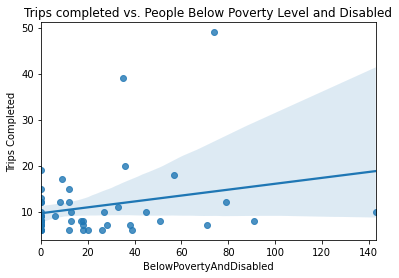

In [110]:
ax=sns.regplot(y='completed',x='BelowPovertyAndDisabled',data=df)
ax.set_title('Trips completed vs. People Below Poverty Level and Disabled')
ax.set_ylabel('Trips Completed')

In [21]:
star['weekday'] = star.requestedPickupTs.dt.day_name()
star['month'] = star.requestedPickupTs.dt.month
star['day'] = star.requestedPickupTs.dt.day
star['hour'] = star.requestedPickupTs.dt.hour

In [22]:
StarTran['weekday'] = star.requestedPickupTs.dt.day_name()
StarTran['month'] = star.requestedPickupTs.dt.month
StarTran['day'] = star.requestedPickupTs.dt.day
StarTran['hour'] = star.requestedPickupTs.dt.hour

In [23]:
startimeframe=pd.DataFrame(StarTran.groupby(star.requestedPickupTs.dt.strftime('%B'))['completed'].count())

In [24]:
startimeframe=startimeframe.reset_index(drop=False)

In [25]:
startimeframe

,requestedPickupTs,completed
0,April,41
1,August,152
2,July,148
3,June,101
4,May,100
5,October,2
6,September,160


In [26]:
startimeframe['requestedPickupTs'] = pd.Categorical(startimeframe['requestedPickupTs'], categories=['April','May','June','July','August','September','October'], ordered=True)
startimeframe=startimeframe.sort_values(by='requestedPickupTs')

In [27]:
startimeframe['return'] = startimeframe['completed'].div(startimeframe['completed'].shift(1))

In [28]:
startimeframe=startimeframe.dropna()

<AxesSubplot:xlabel='requestedPickupTs', ylabel='return'>

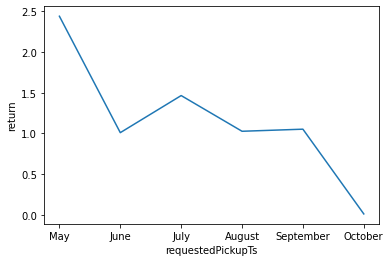

In [29]:
sns.lineplot(x='requestedPickupTs',y='return',data=startimeframe)

In [30]:
startimeframe.to_csv('seniortran.csv')

<AxesSubplot:ylabel='completed'>

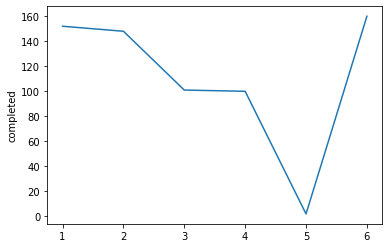

In [31]:
sns.lineplot(x=startimeframe.index,y='completed' ,data=startimeframe)

In [121]:
old=pd.DataFrame(star.groupby(star.CBG)[['MalePop65_67', 'MalePop67_69', 'MalePop70_74', 'MalePop75_79','MalePop80_84', 'MalePop85+','TotalMalePop', 'TotalFemalePop', 'FemalePop65_67','FemalePop67_69', 'FemlePop70_74', 'FemalePop75_79', 'FemalePop80_84','FemalePop85+']].median())

In [122]:
poordisabled=pd.DataFrame(star.groupby(star.CBG)['ProportionPoorAndDisabled'].median().sort_values(ascending=False))


In [123]:
propseniors=pd.DataFrame(star.groupby(star.CBG)['ProportionSeniors'].median().sort_values(ascending=False))
propnocars=pd.DataFrame(star.groupby(star.CBG)['ProportionOfZeroCarHouseholds'].median().sort_values(ascending=False))

In [124]:
old=old.merge(poordisabled,left_on='CBG',right_on='CBG')

In [125]:
old=old.merge(completed, left_on='CBG',right_on='CBG')

In [126]:
old=old.merge(propseniors, left_on='CBG',right_on='CBG')

In [127]:
old=old.merge(propnocars, left_on='CBG',right_on='CBG')

In [128]:
old.sort_values(by='completed',ascending=False)

,MalePop65_67,MalePop67_69,MalePop70_74,MalePop75_79,MalePop80_84,MalePop85+,TotalMalePop,TotalFemalePop,FemalePop65_67,FemalePop67_69,FemlePop70_74,FemalePop75_79,FemalePop80_84,FemalePop85+,ProportionPoorAndDisabled,completed,ProportionSeniors,ProportionOfZeroCarHouseholds
CBG,,,,,,,,,,,,,,,,,,
311090029002,0,16,14,15,0,0,1968,2034,31,31,17,54,33,0,2.373316,49,5.272364,3.377453
311090019001,8,15,5,4,0,0,708,507,12,5,27,0,3,5,4.978663,39,6.913580,26.350245
311090036071,12,10,45,13,0,13,1943,2249,53,17,46,13,13,0,1.508801,20,5.605916,2.325581
311090009003,0,13,7,0,7,0,417,327,8,17,0,15,6,0,0.000000,19,9.811828,17.663818
311090010021,10,20,25,10,20,37,802,931,16,35,26,4,48,66,4.880137,18,18.291979,11.373391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311090008003,12,10,21,0,0,0,679,439,0,20,18,0,0,0,18.301611,0,7.245081,5.234160
311090027021,13,0,27,14,14,14,459,583,26,0,0,14,14,58,3.890490,0,18.618042,11.328125
311090025005,35,0,0,0,0,0,481,512,0,0,13,0,0,0,0.000000,0,4.833837,0.000000


In [113]:
star

,requestedPickupTs,requestedDropoffTs,requestedPickupTsTimestamp,requestedDropoffTsTimestamp,requestedPickupLatitude,requestedPickupLongitude,requestedDropoffLatitude,requestedDropoffLongitude,serviceId,status,...,FemalePop80_84,FemalePop85+,processing,accepted,arriving,inProgress,completed,cancelled,serviceDisruption,Difference
0,2020-06-23 17:45:00,2020-06-23 17:58:57,2020-06-23T17:45:00Z,2020-06-23T17:58:57Z,40.808380,-96.696437,40.858260,-96.677804,2329a3e8-a8bd-408a-829c-f409699e6b24,completed,...,10,0,2020-06-22 13:24:32,2020-06-22 13:24:39,2020-06-23 17:41:00,2020-06-23 17:57:53,2020-06-23 18:14:45,NaT,NaT,1713.233333
1,2020-08-03 15:15:00,2020-08-03 15:34:51,2020-08-03T15:15:00Z,2020-08-03T15:34:51Z,40.808380,-96.696437,40.741263,-96.675073,2329a3e8-a8bd-408a-829c-f409699e6b24,completed,...,10,0,2020-07-31 20:53:32,2020-07-31 20:53:37,2020-08-03 15:11:46,2020-08-03 15:16:52,2020-08-03 15:34:02,NaT,NaT,3983.250000
2,2020-08-04 18:15:00,2020-08-04 18:33:41,2020-08-04T18:15:00Z,2020-08-04T18:33:41Z,40.808380,-96.696437,40.825605,-96.606690,2329a3e8-a8bd-408a-829c-f409699e6b24,completed,...,10,0,2020-07-31 20:56:39,2020-07-31 20:56:41,2020-08-04 18:42:22,2020-08-04 18:47:12,2020-08-04 19:19:34,NaT,NaT,5630.516667
3,2020-06-06 18:45:00,2020-06-06 18:54:14,2020-06-06T18:45:00Z,2020-06-06T18:54:14Z,40.808380,-96.696437,40.814561,-96.650706,2329a3e8-a8bd-408a-829c-f409699e6b24,completed,...,10,0,2020-06-03 15:27:11,2020-06-03 15:27:12,2020-06-06 18:55:16,2020-06-06 19:00:20,2020-06-06 19:12:14,NaT,NaT,4533.133333
4,2020-08-24 16:04:24,2020-08-24 16:19:18,2020-08-24T16:04:24Z,2020-08-24T16:19:18Z,40.808380,-96.696437,40.812909,-96.608981,2329a3e8-a8bd-408a-829c-f409699e6b24,completed,...,10,0,2020-08-24 16:04:43,2020-08-24 16:04:56,2020-08-24 16:20:41,2020-08-24 16:24:59,2020-08-24 16:44:53,NaT,NaT,20.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2020-06-08 15:02:06,2020-06-08 15:07:00,2020-06-08T15:02:06Z,2020-06-08T15:07:00Z,40.805772,-96.626007,40.805889,-96.625903,1cb4005e-3c68-4f88-820b-f651df75c7d7,completed,...,61,125,2020-06-08 14:56:15,2020-06-08 14:56:23,2020-06-08 15:01:56,2020-06-08 15:02:50,2020-06-08 15:07:42,NaT,NaT,6.450000
996,2020-05-19 16:10:06,2020-05-19 16:26:51,2020-05-19T16:10:06Z,2020-05-19T16:26:51Z,40.801012,-96.689007,40.868159,-96.671066,1cb4005e-3c68-4f88-820b-f651df75c7d7,completed,...,0,9,2020-05-19 15:30:35,2020-05-19 15:30:36,2020-05-19 16:06:07,2020-05-19 16:08:18,2020-05-19 16:25:34,NaT,NaT,37.700000
997,2020-09-16 20:15:00,2020-09-16 20:29:27,2020-09-16T20:15:00Z,2020-09-16T20:29:27Z,40.796142,-96.704774,40.782487,-96.622438,2329a3e8-a8bd-408a-829c-f409699e6b24,completed,...,0,0,2020-09-09 14:55:46,2020-09-09 14:55:54,2020-09-16 20:28:08,2020-09-16 20:33:04,2020-09-16 20:57:19,NaT,NaT,10417.166667
998,2020-05-21 18:30:00,2020-05-21 18:47:57,2020-05-21T18:30:00Z,2020-05-21T18:47:57Z,40.783853,-96.626149,40.838936,-96.652036,2329a3e8-a8bd-408a-829c-f409699e6b24,completed,...,109,142,2020-05-14 15:55:52,2020-05-14 15:55:56,2020-05-21 18:40:34,2020-05-21 18:48:01,2020-05-21 19:06:23,NaT,NaT,10252.083333


In [40]:
star.columns

Index(['requestedPickupTs', 'requestedDropoffTs', 'requestedPickupTsTimestamp',
       'requestedDropoffTsTimestamp', 'requestedPickupLatitude',
       'requestedPickupLongitude', 'requestedDropoffLatitude',
       'requestedDropoffLongitude', 'serviceId', 'status', 'statusChanges',
       'travelDistance', 'travelDuration', 'endpoint', 'CBG', 'TotalPop',
       'TotalPovertyStatusAssessed', 'BelowPovertyAndDisabled',
       'ProportionPoorAndDisabled', 'ProportionOfZeroCarHouseholds',
       'ProportionBelowPovertyLevel', 'ProportionSeniors', 'TotalMalePop',
       'MalePop65_67', 'MalePop67_69', 'MalePop70_74', 'MalePop75_79',
       'MalePop80_84', 'MalePop85+', 'TotalFemalePop', 'FemalePop65_67',
       'FemalePop67_69', 'FemlePop70_74', 'FemalePop75_79', 'FemalePop80_84',
       'FemalePop85+', 'processing', 'accepted', 'arriving', 'inProgress',
       'completed', 'cancelled', 'serviceDisruption', 'Difference', 'weekday',
       'month', 'day', 'hour'],
      dtype='object')

In [129]:
old=old[old.completed>10]

Text(0, 0.5, 'Disabled Individuals Below Poverty Level')

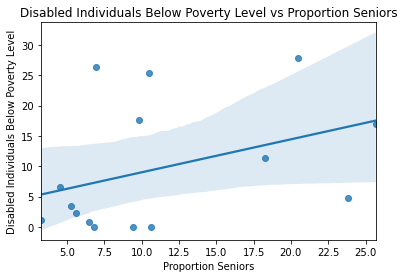

In [130]:

fig=sns.regplot(x='ProportionSeniors',y='ProportionOfZeroCarHouseholds',data=old)
fig.set_title('Disabled Individuals Below Poverty Level vs Proportion Seniors')
fig.set_xlabel('Proportion Seniors')
fig.set_ylabel('Disabled Individuals Below Poverty Level')

In [42]:
star.columns

Index(['requestedPickupTs', 'requestedDropoffTs', 'requestedPickupTsTimestamp',
       'requestedDropoffTsTimestamp', 'requestedPickupLatitude',
       'requestedPickupLongitude', 'requestedDropoffLatitude',
       'requestedDropoffLongitude', 'serviceId', 'status', 'statusChanges',
       'travelDistance', 'travelDuration', 'endpoint', 'CBG', 'TotalPop',
       'TotalPovertyStatusAssessed', 'BelowPovertyAndDisabled',
       'ProportionPoorAndDisabled', 'ProportionOfZeroCarHouseholds',
       'ProportionBelowPovertyLevel', 'ProportionSeniors', 'TotalMalePop',
       'MalePop65_67', 'MalePop67_69', 'MalePop70_74', 'MalePop75_79',
       'MalePop80_84', 'MalePop85+', 'TotalFemalePop', 'FemalePop65_67',
       'FemalePop67_69', 'FemlePop70_74', 'FemalePop75_79', 'FemalePop80_84',
       'FemalePop85+', 'processing', 'accepted', 'arriving', 'inProgress',
       'completed', 'cancelled', 'serviceDisruption', 'Difference', 'weekday',
       'month', 'day', 'hour'],
      dtype='object')

In [43]:
x=star['ProportionSeniors']
y=star['ProportionOfZeroCarHouseholds']

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


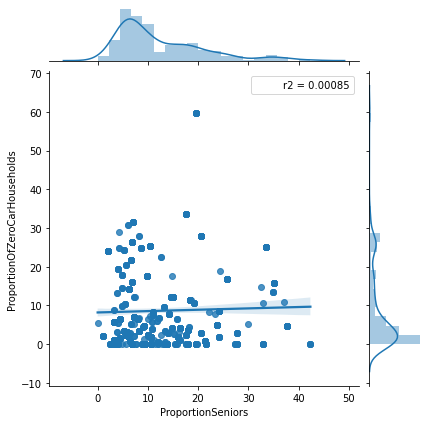

In [44]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
aax=sns.jointplot(x, y, kind="reg", stat_func=r2)


In [45]:

fig, axes = plt.subplots(2,7, sharey=True)

for i, col in enumerate(old.columns.values[:-1]):
    old.plot(x=col, y="completed", kind="scatter")

fig.set_size_inches(11,8)

NameError: name 'plt' is not defined

In [46]:

fig, axes = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)


for i, col in enumerate(old.columns.values[:-1]):
    old.plot(x=[col], y=["completed"], kind="scatter", ax=axes[i])



NameError: name 'plt' is not defined

In [47]:
fig = plt.gcf() --> fig.set_size_inches(11,8)

SyntaxError: invalid syntax (<ipython-input-47-58d9b213eb94>, line 1)

In [48]:
figsize = (10, 8)
rows = 5
cols = (len(old.columns.values)-1)/rows


In [49]:
rows

5

In [50]:
figsize = (10, 8)
cols = 3
rows = int(len(old.columns.values)-1 // cols + 1)

In [51]:
dropoffplaces=StarTran.groupby(['requestedDropoffLatitude','requestedDropoffLongitude']).count().sort_values(by='requestedPickupTs',ascending=False).head(30)
pickupplaces=StarTran.groupby(['requestedPickupLatitude','requestedPickupLongitude']).count().sort_values(by='requestedPickupTs',ascending=False).head(30)

In [52]:
pickupplaces=pd.DataFrame(pickupplaces.requestedPickupTs)
pickupplaces.columns = ['count']
dropoffplaces=pd.DataFrame(dropoffplaces.requestedPickupTs)
dropoffplaces.columns = ['count']

In [53]:
dropoffplaces=dropoffplaces.reset_index(drop=False)
pickupplaces=pickupplaces.reset_index(drop=False)

In [54]:
#foresquare api calls 
dropoffplaces

,requestedDropoffLatitude,requestedDropoffLongitude,count
0,40.866607,-96.670443,654
1,40.791052,-96.705965,401
2,40.811383,-96.701171,382
3,40.813946,-96.613662,295
4,40.816005,-96.656546,267
5,40.867916,-96.636490,252
6,40.758651,-96.699529,250
7,40.752308,-96.670371,211
8,40.814110,-96.698720,198
9,40.823321,-96.669609,192


In [397]:
def venue(row):
    response=re.get(f'https://api.foursquare.com/v2/venues/explore?&client_id=U1LIYUJJ0O04OELM1Q0NRFGGFHIOCJ15PC25YT054UUOOR1U&client_secret=OHDJGPRV2M14IG0OLOB0Y5BDDQTTW2TSCWFIB5UHNXDIBDZW&v=20201003&ll={row["requestedPickupLatitude"]},{row["requestedPickupLongitude"]}&radius=500&limit=2').json()
    try:
        return response['response']['groups'][0]['items'][0]['venue']['categories'][0]['name']
    except:
        return 'error'

In [403]:
def destination(row):
    response=re.get(f'https://api.foursquare.com/v2/venues/explore?&client_id=U1LIYUJJ0O04OELM1Q0NRFGGFHIOCJ15PC25YT054UUOOR1U&client_secret=OHDJGPRV2M14IG0OLOB0Y5BDDQTTW2TSCWFIB5UHNXDIBDZW&v=20201003&ll={row["requestedDropoffLatitude"]},{row["requestedDropoffLongitude"]}&radius=500&limit=2').json()
    try:
        return response['response']['groups'][0]['items'][0]['venue']['categories'][0]['name']
    except:
        return 'error'

In [398]:
pickupplaces['cat']=pickupplaces.apply(lambda row:venue(row),axis=1)


In [404]:
dropoffplaces['cat']=dropoffplaces.apply(lambda row:destination(row),axis=1)


In [405]:
dropoffplaces

,requestedDropoffLatitude,requestedDropoffLongitude,count,cat
0,40.866607,-96.670443,654,Asian Restaurant
1,40.791052,-96.705965,401,Ice Cream Shop
2,40.811383,-96.701171,382,Pizza Place
3,40.813946,-96.613662,295,Burger Joint
4,40.816005,-96.656546,267,Fried Chicken Joint
5,40.867916,-96.636490,252,Skate Park
6,40.758651,-96.699529,250,Coffee Shop
7,40.752308,-96.670371,211,Chinese Restaurant
8,40.814110,-96.698720,198,Burger Joint
9,40.823321,-96.669609,192,Coffee Shop


In [406]:
pickupplaces

,requestedPickupLatitude,requestedPickupLongitude,count,cat
0,40.866607,-96.670443,747,Asian Restaurant
1,40.811383,-96.701171,410,Pizza Place
2,40.791052,-96.705965,333,Ice Cream Shop
3,40.816005,-96.656546,286,Fried Chicken Joint
4,40.758651,-96.699529,281,Coffee Shop
5,40.813946,-96.613662,259,Burger Joint
6,40.867916,-96.636490,235,Skate Park
7,40.752308,-96.670371,211,Chinese Restaurant
8,40.756036,-96.700257,205,Sandwich Place
9,40.814110,-96.698720,199,Burger Joint


In [344]:
#The first major pickup and dropoff point is a dialysis centre
#Second is a rehab centre
#third is a bus stop 40.811383	-96.701171
#fourth is 40.816005	-96.656546 doctors office 
#fifth is dialysis centre
#sixth is a dialysis centre
#7th is church
#8th is a doctors office
#9th is resturaunt
#10th is court

In [ ]:
#high race community 
#one is transit
#two is amazon factory
#three is transit
#fourth is amazon
#amazon
#transit
#transit
#amazon
#transit


#white
#transit
#walmart
#pool and waterpark
#municipal address
#bus stop
#mcdonalds
#transit
#transit
#grocery
#mall